___
# Atividade: <p> <center> Análise Exploratória -  Variáveis Quantitativas
___

## Aula 07

**Objetivo da aula:** Ao final desta aula, o aluno deve ser capaz de:
 * Calcular medidas que representem os percentis (ou quantis) de uma particular amostra e interpreta-los;
 * Construir um HISTOGRAMA útil para visualização gráfica de variáveis quantitativas;
 * Explicar vantagens sobre o uso da densidade na construção de um histograma e saber interpretá-lo; e
 * Discutir alguns formatos de um histograma e suas relações com as medidas de posição: média, mediana e moda.

___
<div id="indice"></div>

## Índice

- [Empresa de TV](#empresa-de-tv)


- [Análise Exploratória - Medidas resumo](#medidasresumo)
    - [Revisão do Exercício 2 da Aula 05](#ex2aula05)
    - [Revisão Exercício 3 da Aula 05](#ex3aula05)   
    - [Revisão Exercício 6 da Aula 05 - Relembrando uso de `describe()` e `groupby(by= )`](#ex6aula05)
    
- [Análise Exploratória - Boxplot](#boxplot)
    - [Revisão Exercício 10 da Aula 05 - Relembrando uso do `plt.boxplot()`](#ex10aula05)    
    
- [Análise Exploratória - Histograma](#histograma)
    - [Exercício 1](#ex1)
    - [Exercício 2](#ex2) 
    - [Exercício 3](#ex3) 
   

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import os
from numpy import arange
import numpy as np

# Para ter melhor print
from IPython.display import display

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
/Users/cauedagostinho/Documents/Insper/2˚sem/Cdados


___
<div id="empresa-de-tv"></div>

# Empresa de TV

<img src="data/empresaTV.jpg" height="400">

Fonte: extraído da internet

Uma empresa de TV via satélite criou recentemente dois tipos de planos de canais (A e B).

A empresa tem como objetivo estudar o perfil dos clientes que aderiram ao plano para enviar malas diretas aos potenciais clientes de cada tipo de plano.

A base de dados apresenta algumas variáveis para uma amostra de 82 clientes selecionados aleatoriamente dentre aqueles que aderiram aos planos. As variáveis têm os seguintes significados:

* CLIENTE: identificador do cliente.
* PLANO: apresenta o plano adquirido pelo cliente – (1=A ou 2=B). 
* EC: apresenta estado civil do cliente no momento da adesão ao  plano – (1=Casado, 2=Solteiro e 3=Outros).
* SATISFACAO: grau de satisfação do cliente pelo plano – 
	(5=Muito satisfeito, 4=Satisfeito, 3=Indiferente, 2=Insatisfeito e 1=Muito insatisfeito).
* RENDA: renda pessoal do cliente, em milhares de reais.

O arquivo `EmpresaTV Cod.xlsx` contém as variáveis descritas acima.

<br>

**Leitura e Preparo da base de dados:**

In [4]:
dados = pd.read_excel('data/EmpresaTV_Cod.xlsx')

# Definições necessárias vistas na Aula 02
dados.PLANO = dados.PLANO.astype('category')
dados.EC = dados.EC.astype('category')
dados.SATISFACAO = dados.SATISFACAO.astype('category')
dados.RENDA = dados.RENDA.astype('float')

dados.PLANO.cat.categories = (['A', 'B']) # Seguindo a ordem [1,2]
dados.EC.cat.categories = (['Casado', 'Solteiro', 'Outros']) #Seguindo a ordem [1,2,3]

# Pelo fato de SATISFACAO ser ordinal
dados.SATISFACAO = pd.Categorical(dados.SATISFACAO, 
                                  categories = ['Muito Insatisfeito', 'Insatisfeito', 'Indiferente', 
                                                   'Satisfeito', 'Muito Satisfeito'], 
                                  ordered=True)

[Volta ao Índice](#indice)

___
<div id="medidasresumo"></div>

# Medidas resumo

Para compreender as informações contidas em variáveis quantitativas, podemos recorrer ao cálculo de algumas medidas resumo como  por exemplo:
  * média: [Series.mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html)
  * mediana [Series.median()](https://pandas.pydata.org/docs/reference/api/pandas.Series.median.html)
  * percentis: [Series.quantile()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.quantile.html)
  * desvio padrão: [Series.std()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.std.html)
  * variância: [Series.var()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.var.html)
  

<div id="ex2aula05"></div>

No **Exercicio 2** do notebook da **Aula05_Atividade**, foi pedido para segmentar a base de dados por plano e criar uma variável renda para cada plano.

A seguir, temos as respostas para esse exercício:


In [5]:
# Cria dataframes apenas com clientes do plano colocado no filtro de linhas
dados_a = dados.loc[dados['PLANO'] == 'A',:]
dados_b = dados.loc[dados['PLANO'] == 'B',:]

# Cria Series considerando apenas a coluna renda com clientes de um particular plano
renda_a = dados.loc[dados['PLANO'] == 'A','RENDA']
renda_b = dados.loc[dados['PLANO'] == 'B','RENDA']

#ou
renda_a = dados_a['RENDA']
renda_b = dados_b['RENDA']

[Volta ao Índice](#indice)

<div id="ex3aula05"></div>

Já no **Exercicio 3** do notebook da **Aula05_Atividade**, foi pedido para imprimir tamanho amostral, média, primeiro quartil (percentil de ordem 25%), segundo quartil (mediana), terceiro quartil (percentil de ordem 75%), mínimo, máximo, desvio padrão e variância das rendas do clientes para cada plano A e B, separadamente.

A seguir, temos as respostas para esse exercício:


In [6]:
for plano, var_quanti in (('Plano A', renda_a), ('Plano B', renda_b)):
    print('-' * 40)
    print(plano)
    print('-' * 40)
    print(f'contagem               = {len(var_quanti)}')
    print(f'média                  = {var_quanti.mean():.3f}')
    print(f'mínimo                 = {var_quanti.min():.3f}')
    print(f'primeiro quartil (Q1)  = {var_quanti.quantile(q=0.25):.3f}')
    print(f'mediana          (Q2)  = {var_quanti.median():.3f}')
    print(f'terceiro quartil (Q3)  = {var_quanti.quantile(q=0.75):.3f}')
    print(f'máximo                 = {var_quanti.max():.3f}')
    print(f'variância amostral     = {var_quanti.var():.3f}')
    print(f'desvio padrão amostral = {var_quanti.std():.3f}')
    print()

----------------------------------------
Plano A
----------------------------------------
contagem               = 46
média                  = 10.422
mínimo                 = 0.700
primeiro quartil (Q1)  = 7.475
mediana          (Q2)  = 10.350
terceiro quartil (Q3)  = 13.200
máximo                 = 21.400
variância amostral     = 19.941
desvio padrão amostral = 4.466

----------------------------------------
Plano B
----------------------------------------
contagem               = 36
média                  = 5.689
mínimo                 = 0.600
primeiro quartil (Q1)  = 4.150
mediana          (Q2)  = 5.150
terceiro quartil (Q3)  = 6.375
máximo                 = 19.200
variância amostral     = 10.847
desvio padrão amostral = 3.293



[Volta ao Índice](#indice)

<div id="ex6aula05"></div>

No **Exercicio 6** do notebook da **Aula05_Atividade**, foi pedido para obter as medidas-resumo da variável `RENDA` segmentadas por `PLANO`, fazendo uso dos comandos `describe()`  junto com `groupby(by= )`

Relembrando uso de `describe()` e `groupby(by= )`. Vamos lembrar como fazê-lo? <br>


In [11]:
# sintaxe:
# df.groupby('NOME Variável Qualitativa').NOME_Variável.comando
dados.groupby('PLANO').RENDA.describe().round(3)

,count,mean,std,min,25%,50%,75%,max
PLANO,,,,,,,,
A,46.0,10.422,4.466,0.7,7.475,10.35,13.200,21.4
B,36.0,5.689,3.293,0.6,4.150,5.15,6.375,19.2


In [15]:
dados.groupby(by=['PLANO', 'SATISFACAO'])['RENDA'].describe()

count       mean       std   min     25%    50%  \
PLANO SATISFACAO                                                            
A     Muito Insatisfeito    2.0   1.300000  0.848528   0.7   1.000   1.30   
      Insatisfeito          5.0   4.560000  2.170944   0.8   4.700   5.30   
      Indiferente           7.0   7.971429  1.538088   6.1   6.900   7.40   
      Satisfeito           20.0  11.075000  2.938291   7.4   9.350  10.55   
      Muito Satisfeito     12.0  14.725000  2.837452  11.2  12.900  13.75   
B     Muito Insatisfeito    6.0   3.233333  2.233980   0.6   1.225   3.60   
      Insatisfeito         11.0   4.027273  1.036427   2.5   3.400   4.00   
      Indiferente          12.0   5.541667  1.104913   4.2   4.900   5.35   
      Satisfeito            7.0  10.657143  3.892667   7.9   8.600   9.50   

                             75%   max  
PLANO SATISFACAO                        
A     Muito Insatisfeito   1.600   1.9  
      Insatisfeito         6.000   6.0  
      Indiferente          9.100  10.3  
      Satisfeito          11.925  18.5  
      Muito Satisfeito    16.000  21.4  
B     Muito Insatisfeito   5.150   5.5  
      Insatisfeito         4.600   5.7  
      Indiferente          5.900   8.1  
      Satisfeito          10.400  19.2

[Volta ao Índice](#indice)

___
<div id="boxplot"></div>

# Análise Exploratória - Boxplot

O boxplot usa os quartis, os quais segmentam os dados em quatro partes iguais em termos de concentração, ou seja, deixa 25% do tamanho da amostra entre os cinco pontos: **mínimo**, $Q1$, $Q2$, $Q3$ e **máximo**. <br>
Ou seja, entre o mínimo e o primeiro quartil (Q1), estão os 25% menores valores observados para uma determinada variável quantitativa; já entre terceiro quartil (Q3) e o máximo, os 25% maiores valores observados. <br>
Esse gráfico é uma ferramenta estatística muito importante para extrair informações de **variáveis quantitativas**, além de permitir, com facilidade, cruzar variável quantitativa segmentada por rótulos (níveis) de outra variável qualitativa. <br>
Outra vantagem desse gráfico é que o mesmo permite identificar possíveis valores atípicos caso haja observação com valor fora dos limites inferior ($LI$) e superior ($LS$), os quais são calculados a partir dos quartis $Q1$ e $Q3$ da seguinte forma:

 * $LI = Q1 - 1,5 * (Q3 - Q1)$
 * $LS = Q3 + 1,5 * (Q3 - Q1)$
 
A interpretação de um boxplot envolve observar a mediana, a dispersão dos dados (diferença entre $Q3$ e $Q1$) e a presença de valores atípicos. 

<br>

**VALORES QUE SÃO CONSIDERADOS NA CONSTRUÇÃO DO BOXPLOT:**

  * **Caixa do boxplot** é formada pelos quartis $Q1$ e $Q3$ e dentro é colocada uma linha de acordo com o valor obtido para a mediana ($Q2$). Esses valores são colocados de acordo com a escala definida no eixo y do gráfico.
  * **Haste inferior** representada pelo menor valor numérico contido no conjunto de dados desde que esse seja maior que o limite inferior ($LI$). 
  * **Haste superior** representado pelo maior valor numérico contido no conjunto de dados desde que esse seja menor que o limite superior ($LS$). 
  * **Valores atípicos** representados pelos valores no conjunto de dados que são menores do que o $LI$ ou pelos valores no conjunto de dados que são maiores do que o $LS$. No boxplot, cada observação fora dos limites inferior e superior deve ser sinalizado por um ponto vazado como este $\Large{\circ}$ no gráfico, seguindo a grandeza da escala construída no eixo y.



Para consultar uso de cores na edição de um boxplot, consulte [link1](https://www.geeksforgeeks.org/box-plot-in-python-using-matplotlib/) e [link2](https://stackoverflow.com/questions/41997493/python-matplotlib-boxplot-color), por exemplo.

<br>

A seguir, apresentamos o comando para gerar o **BOXPLOT** a partir do *matplotlib*. <br>
Aproveite para entender o uso do comando `plt.subplot(linhas,colunas,posição)` útil para visualização da análise exploratória dos dados.<br>
Note que é colocado apenas um `plt.show()` ao final de todo o código para fechar a janela gráfica, ou seja, nenhum código será adicionado na janela gráfica que o `plt.figure` abriu após executar o comando `plt.show()`.

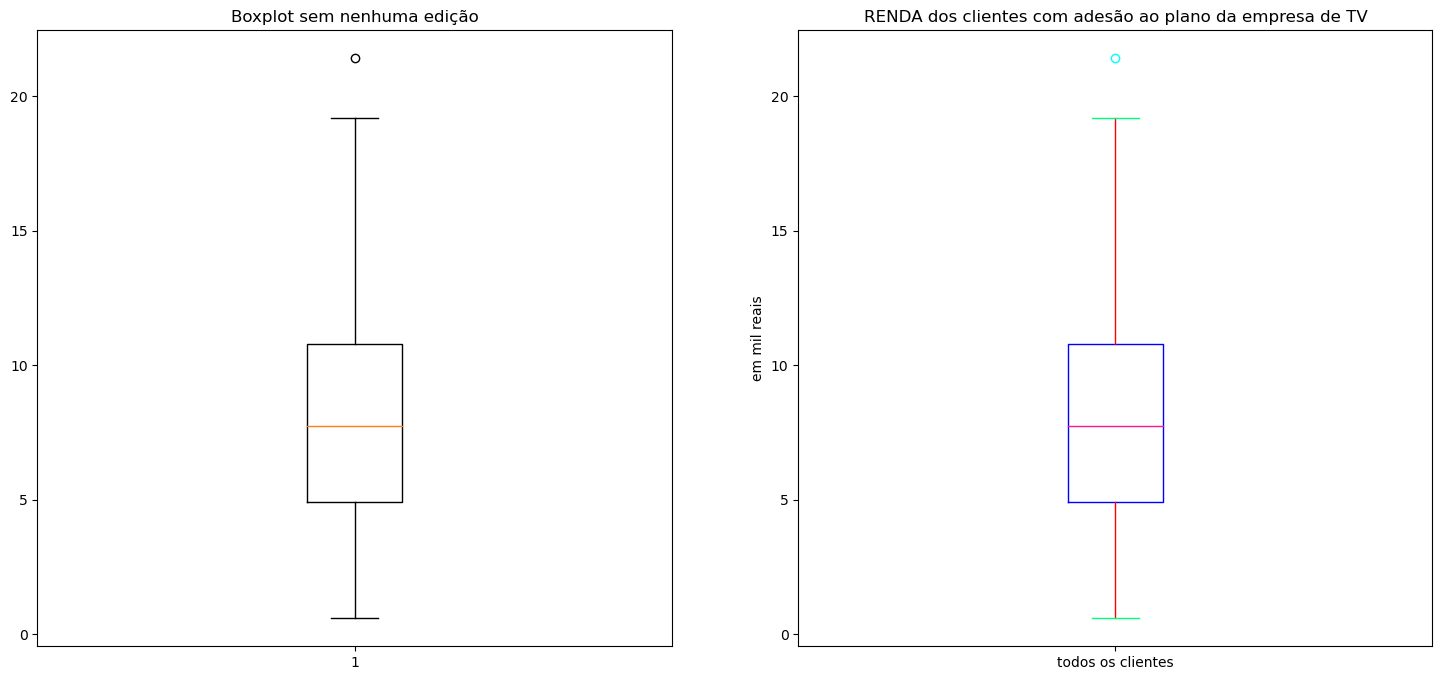

In [22]:
plt.figure(figsize=(18,8))

plt.subplot(1,2,1)
plt.boxplot(dados.RENDA)
plt.title('Boxplot sem nenhuma edição')

plt.subplot(1,2,2)
plt.boxplot(dados.RENDA, labels = ['todos os clientes'],  
            boxprops=dict(color='blue'),
            medianprops=dict(color='deeppink'),
            capprops=dict(color='springgreen'),
            whiskerprops=dict(color='red'),
            flierprops=dict(color='yellow', markeredgecolor='cyan')
            )
plt.title('RENDA dos clientes com adesão ao plano da empresa de TV')
plt.ylabel('em mil reais')

plt.show()

<div id="ex10aula05"></div>

No **Exercicio 10** do notebook da **Aula05_Atividade**, foi pedido para estudar o comportamento da variável quantitativa `RENDA` segmentado por `PLANO` utilizando a ferramenta gráfica Boxplot.

Vamos lembrar como fazê-lo?

Faça de duas formas diferentes:
  1. Construção dos boxplots da renda para cada plano em gráficos separados. Aqui, podem usar o comando `plt.subplot()` para organizar o *output* adaptando o código acima.
  1. Construção de um único gráfico (apenas um eixo y) contendo os dois boxplots da renda para cada plano.
  1. Discuta prols e contras de cada caso.

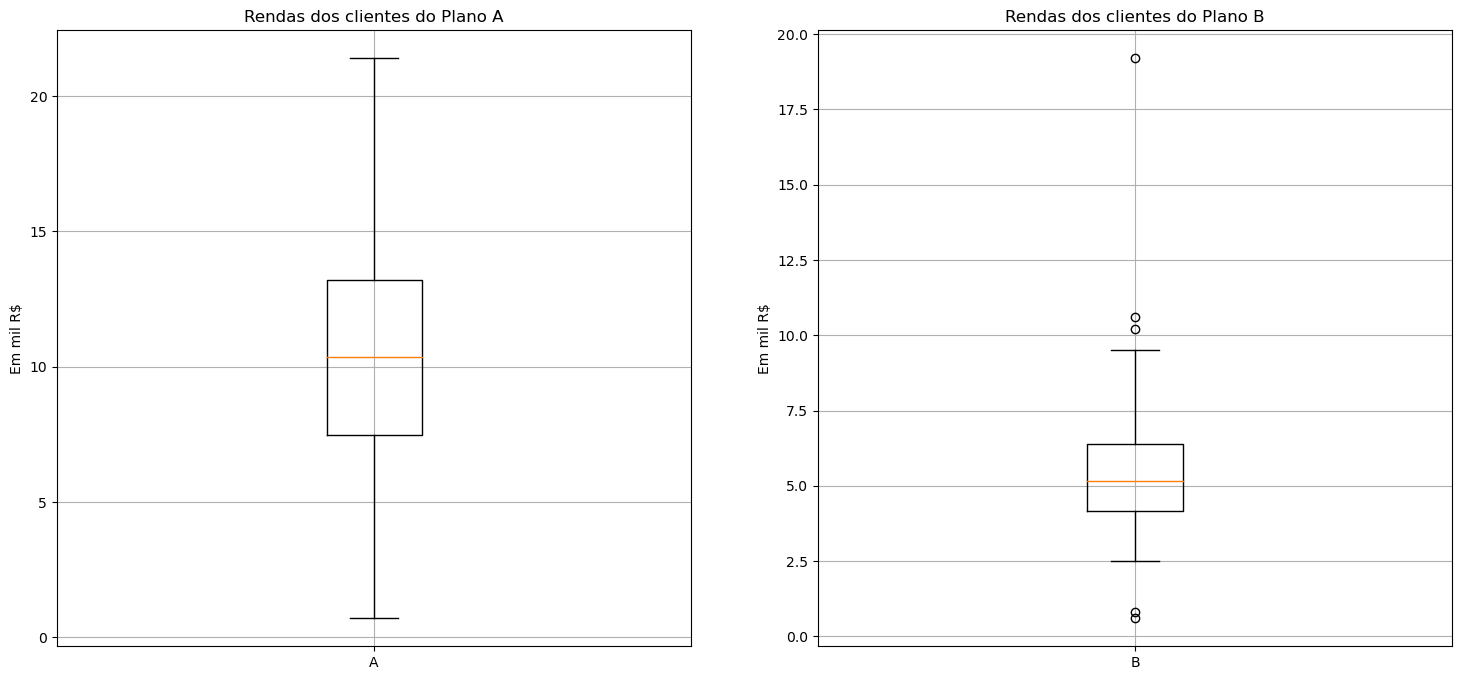

In [20]:
#PEDIDO 1
plt.figure(figsize=(18,8))

plt.subplot(1, 2, 1)   # Quebra janela gráfica em 1 linha, 2 colunas e posiciona na 1
plt.grid()
plt.boxplot(dados_a['RENDA'], labels=['A'])  # Selecionando apenas a renda do PLANO contido no df dados
plt.title('Rendas dos clientes do Plano A')
plt.ylabel('Em mil R$')

plt.subplot(1, 2, 2)   # Quebra janela gráfica em 1 linha, 2 colunas e posiciona na 2
plt.grid()
plt.boxplot(dados_b['RENDA'], labels=['B'])  # Selecionando apenas a renda do PLANO contido no df dados
plt.title('Rendas dos clientes do Plano B')
plt.ylabel('Em mil R$')

plt.show()

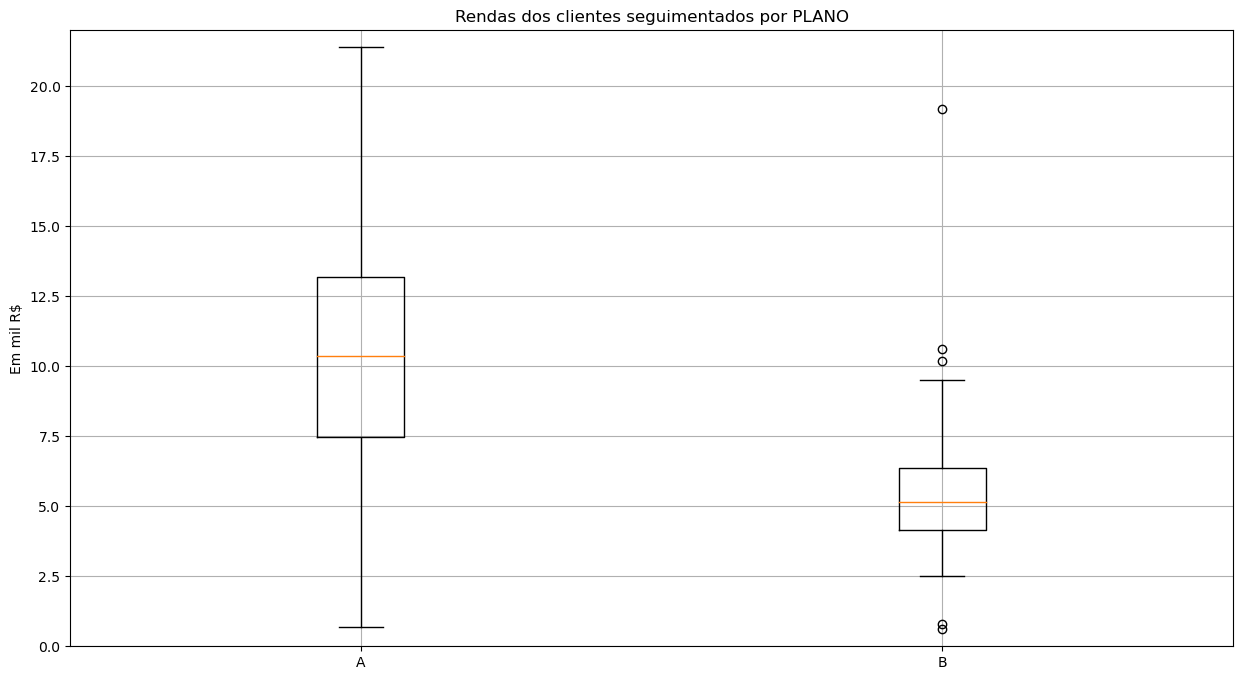

In [33]:
# PEDIDO 2
plt.figure(figsize=(15,8))

# Para colocar vários boxplots usando o mesmo eixo y, colocar os valores em forma de lista no primeiro argumento
# da função boxplot

plt.grid()
plt.boxplot([dados_a['RENDA'], dados_b['RENDA']], labels=dados['PLANO'].cat.categories)  # Selecionando apenas a renda do PLANO contido no df dados
plt.title('Rendas dos clientes seguimentados por PLANO')
plt.ylabel('Em mil R$')
plt.ylim(0, 22)

plt.show()

[Volta ao Índice](#indice)

___
<div id="histograma"></div>

# Análise Exploratória - Histograma

O histograma é um gráfico adequado para representar as frequências (de contagem ou relativas) de variáveis OBRIGATORIAMENTE
**quantitativas**. 

No **eixo x**, tem-se a representação da **grandeza da variável quantitativa** que está sendo estudada.

No **eixo y**, o *default* considera a frequência absoluta (contagem). Entretanto, há dois importantes motivos que nos animam a utilizar a medida **densidade** alterando o argumento *density* para *True*, ou seja, `density=True`. Veja os motivos:
  * Considerar a densidade no eixo y, permite considerar faixas com amplitudes diferentes sem distorção de interpretação.
  * Considerar a densidade no eixo y, garante que a área do histograma seja igual a $1$ permitindo colocar curvas probabilísticas cuja área total também é $1$.

Para construí-lo considerando a biblioteca `matplotlib`, consulte [aqui](https://matplotlib.org/3.3.1/api/_as_gen/matplotlib.pyplot.hist.html).

<div id="ex1"></div>

### EXERCÍCIO 1

Execute a célula a seguir e veja algumas possibilidades de histograma com a variável `RENDA` considerando todos os clientes.

Analise os quatro histogramas abaixo, observando:
 * o significado dos argumentos utilizados em cada caso;
 * o significado dos valores considerados no eixo x; e
 * o significado dos valores considerados no eixo y.

Um dos quatro histogramas está seguramente errado. Identifique-o e descreva o motivo.

<br> 

**Atenção:** 
 * Aproveite para compreender o uso do comando `plt.subplot(Número de linhas, Número de colunas, Posição do gráfico)`. 
 * Esse comando é útil para colocar vários gráficos dentro da mesma janela gráfica, cujo tamanho é dado em `plt.figure(figsize=(largura, comprimento)`.

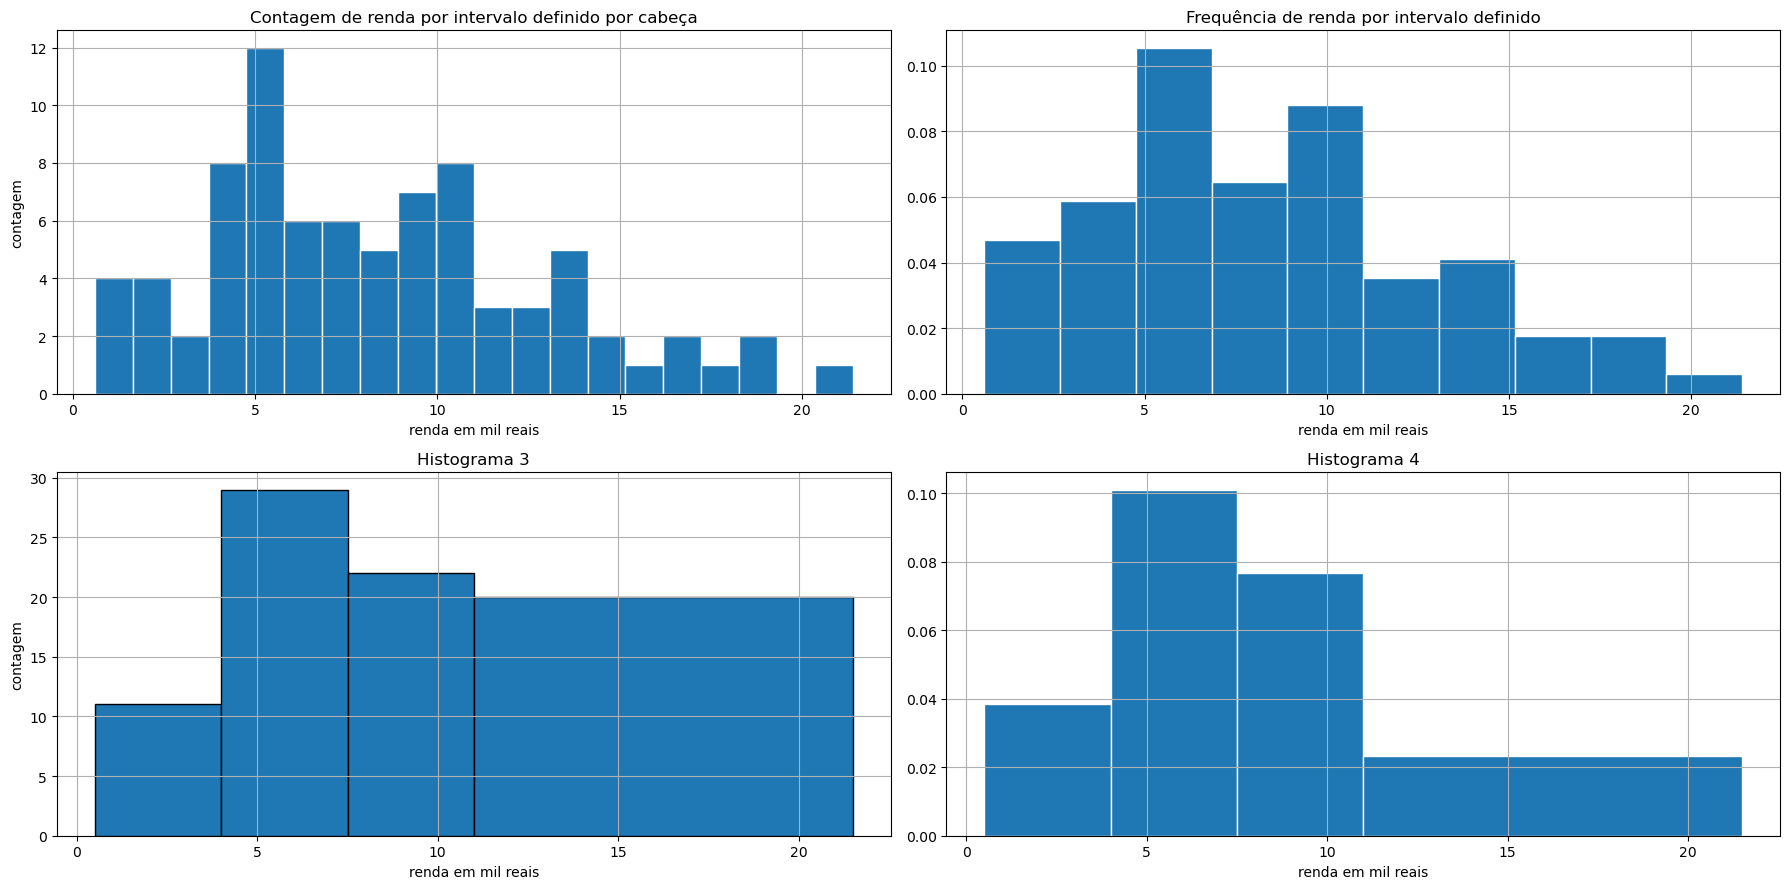

In [45]:
plt.figure(figsize=(18, 9))

plt.subplot(221) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 1
plt.hist(dados.RENDA, edgecolor='white', bins=20)
plt.title("Contagem de renda por intervalo definido por cabeça")
plt.grid()
plt.ylabel('contagem')
plt.xlabel('renda em mil reais')


plt.subplot(222) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 2
plt.hist(dados.RENDA, edgecolor='white', density=True)
plt.title("Frequência de renda por intervalo definido")
plt.grid()
plt.xlabel('renda em mil reais')


plt.subplot(223) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 3
plt.hist(dados.RENDA, bins=[0.5,4,7.5,11,21.5], edgecolor='black')
plt.title("Histograma 3")
plt.grid()
plt.ylabel('contagem')
plt.xlabel('renda em mil reais')


plt.subplot(224) # Janela gráfica com 2 linhas, 2 colunas e histograma a seguir é colocado na posição 4
plt.hist(dados.RENDA, bins=[0.5,4,7.5,11,21.5], edgecolor='white', density=True)
plt.title("Histograma 4")
plt.grid()
plt.xlabel('renda em mil reais')


plt.tight_layout()
plt.show() # Fecha a janela gráfica. Use apenas uma vez para cada plt.figure()

In [ ]:
# Coloque sua interpretação aqui

In [ ]:
# o gráfico errado é o terceiro

[Volta ao Índice](#indice)

<div id="ex2"></div>

### EXERCÍCIO 2

Faça dois histogramas com as seguintes restrições:
  * crie uma janela gráfica de largura igual a 15 e altura igual a 10
  * use plt.subplot() com 2 linhas e 1 coluna
  
  
  * no gráfico da posição 1 do subplot criado acima:
    * usar variável renda com todos os clientes
    * usar densidade no eixo y
    * faixas com amplitudes iguais de tamanho $3.5$ 
    * iniciar faixa em $0.5$
    * use o comando `arange` da biblioteca `numpy` para construir essas faixas. Busque a sintaxe desse comando no seu navegador
    
    
  * no gráfico da posição 2 do subplot criado acima:
    * usar variável renda com todos os clientes
    * usar densidade no eixo y
    * faixas com amplitudes desiguais dadas pela lista `[ 0.5, 4, 7.5, 11, 21.5]`


  * use as cores descritas [aqui](https://matplotlib.org/stable/gallery/color/named_colors.html), caso queira incrementar a visualização dos histogramas. Leia [aqui](https://marketingpordados.com/marketing/data-visualization-x-dashboards-entenda-qual-e-diferenca-2/) e [aqui](https://aodigital.com.br/data-visualization/) para saber a importância do DataViz.

In [ ]:
# COLOQUE SEU CÓDIGO AQUI

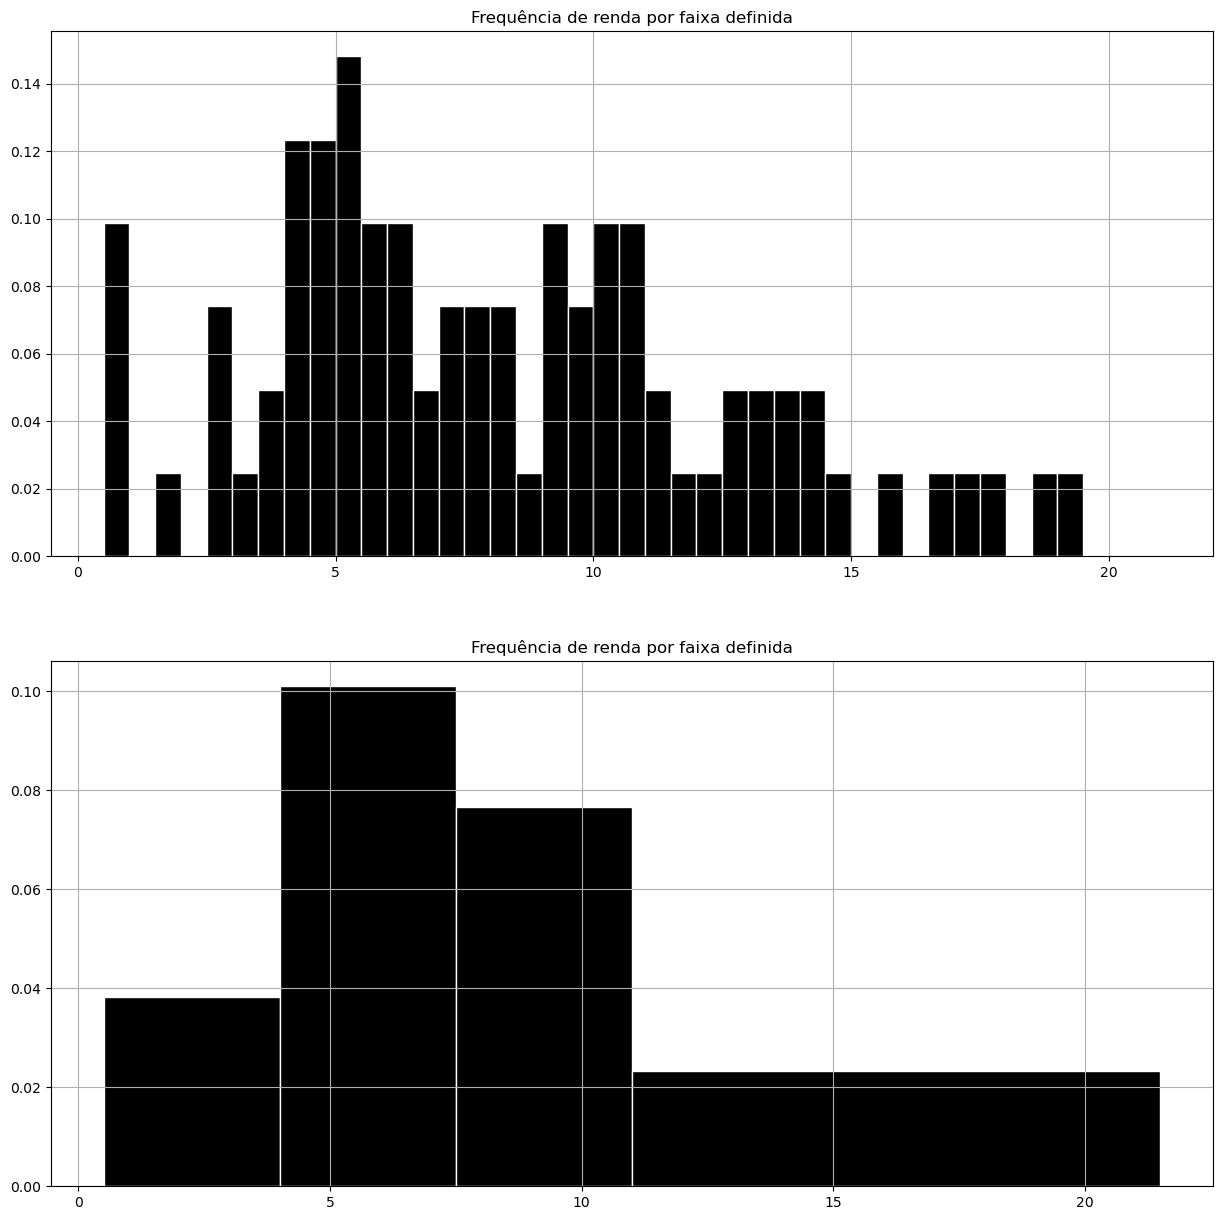

In [53]:
plt.figure(figsize=(15, 15))

plt.subplot(211)
array = np.arange(0.5, 21.5, 0.5)
plt.hist(dados['RENDA'], density=True, bins=array, edgecolor='white', color='black')
plt.grid()
plt.title('Frequência de renda por faixa definida')


plt.subplot(212)
plt.hist(dados['RENDA'], density=True, bins=[ 0.5, 4, 7.5, 11, 21.5], edgecolor='white', color='black')
plt.grid()
plt.title('Frequência de renda por faixa definida')

plt.show()

[Volta ao Índice](#indice)

<div id="ex3"></div>

### EXERCÍCIO 3

Faça dois histogramas com as seguintes restrições:
  * crie uma janela gráfica de largura igual a 15 e altura igual a 5
  * use plt.subplot() com 1 linha e 2 colunas
  * usar variável renda segmentada por plano (um histograma para cada plano)
  * usar densidade no eixo y
  * faixas com amplitudes iguais de tamanho $3$ 
  * iniciar faixa em $0.5$
  * use o comando `arange` da biblioteca `numpy` para construir essas faixas. Busque a sintaxe desse comando no seu navegador
  * identificar o plano no título do gráfico
  * identificar rótulos (label) com significado dos eixos x e y
  * manter eixo y dos dois gráficos na mesma escala
  * use as cores descritas [aqui](https://matplotlib.org/stable/gallery/color/named_colors.html), caso queira incrementar a visualização dos histogramas. Leia [aqui](https://marketingpordados.com/marketing/data-visualization-x-dashboards-entenda-qual-e-diferenca-2/) e [aqui](https://aodigital.com.br/data-visualization/) para saber a importância do DataViz.

In [ ]:
# COLOQUE SEU CÓDIGO AQUI

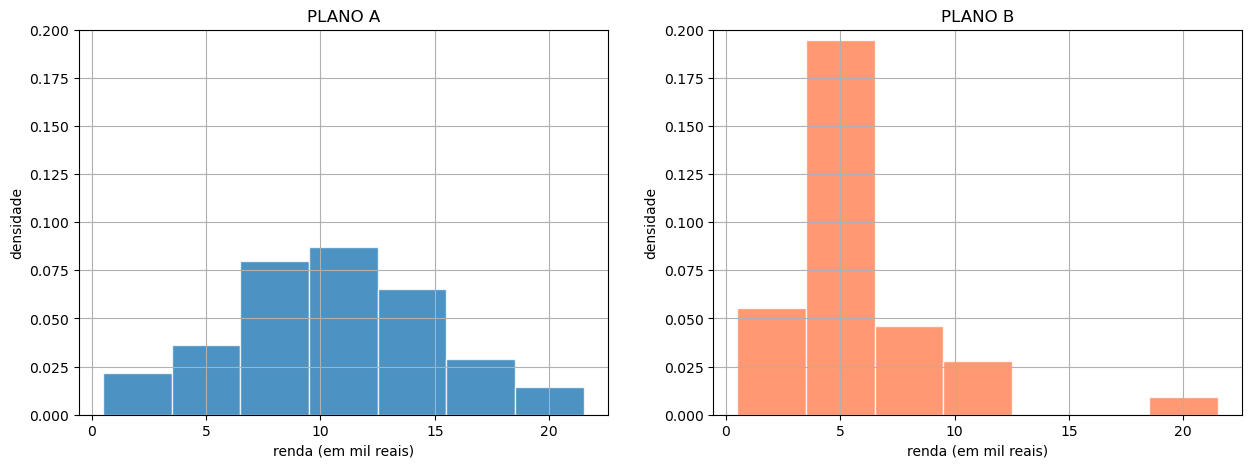

In [57]:
faixas3 = arange(0.5, 22, 3)

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.hist(dados_a['RENDA'], bins=faixas3, edgecolor='white', 
         density=True, linewidth=1, alpha=0.8)
plt.ylim(0, 0.2)
plt.xlabel('renda (em mil reais)')
plt.ylabel('densidade')
plt.title('PLANO A')
plt.grid()

plt.subplot(122)
plt.hist(dados_b['RENDA'], bins=faixas3, edgecolor='white', 
         color='coral', density=True, linewidth=1, alpha=0.8)
plt.ylim(0, 0.2)
plt.xlabel('renda (em mil reais)')
plt.ylabel('densidade')
plt.title('PLANO B')
plt.grid()

plt.show()

[Volta ao Índice](#indice)